In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load Dataset
loadDF = pd.read_csv("Dispute_Claims.csv")

In [3]:
#total row and column
rowcol=loadDF.shape
rowcol

(929, 15)

In [4]:
#column levwl datatype
loadDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0    btch_id                            929 non-null    object
 1    appl_nm                            929 non-null    object
 2    obj_nm                             929 non-null    object
 3    dta_lyr_nm                         929 non-null    object
 4    jb_stts_cd                         929 non-null    object
 5    jb_cmpltn_ts                       929 non-null    object
 6    ld_ts                              929 non-null    object
 7    src_rec_qty                        929 non-null    int64 
 8    tgt_rec_qty                        929 non-null    int64 
 9    err_rec_qty                        929 non-null    int64 
 10   crtd_by_nm                         929 non-null    object
 11   jb_strt_ts                         929 non-null    object

In [5]:
#sample dataframe
loadDF.sample(5)

,btch_id,appl_nm,obj_nm,dta_lyr_nm,jb_stts_cd,jb_cmpltn_ts,ld_ts,src_rec_qty,tgt_rec_qty,err_rec_qty,crtd_by_nm,jb_strt_ts,jb_durtn_tm_ss,fl_nm,sys_btch_nr
698,EA_2.3-EAI3912_EA_20200730100138,job_EA_loadNonConfigJSON,dispute_histl_dta,hist_ctrl,success,2020-07-30 10:03:18.000,2020-07-29 23:25:00.384,99,0,0,srvc_nextgen_hpro,2020-07-30 10:02:11.000,67,,EA_2.3-EAI3912_EA
294,EA_2.3-EAI3912_EA_20200728113029,job_EA_loadNonConfigJSON,dispute_histl_dta,hist_ctrl,success,2020-07-28 11:32:16.000,2020-07-28 03:10:03.291,739,0,0,srvc_nextgen_hpro,2020-07-28 11:31:03.000,73,,EA_2.3-EAI3912_EA
493,EA_2.3-EAI3912_EA_20200729101524,job_EA_loadNonConfigJSON,dispute_histl_dta,hist_rw,success,2020-07-29 10:18:51.000,2020-07-28 21:25:00.276,191,0,0,srvc_nextgen_hpro,2020-07-29 10:15:56.000,175,,EA_2.3-EAI3912_EA
756,EA_2.3-EAI3912_EA_20200730164727,job_EA_loadNonConfigJSON,dispute_histl_dta,hist_ctrl,success,2020-07-30 16:50:01.000,2020-07-30 16:20:00.352,5642,0,0,srvc_nextgen_hpro,2020-07-30 16:48:12.000,109,,EA_2.3-EAI3912_EA
842,EA_2.3-EAI3912_EA_20200731033031,job_EA_loadNonConfigJSON,dispute_histl_dta,hist_ctrl,success,2020-07-31 03:33:01.000,2020-07-30 16:20:00.352,5642,0,0,srvc_nextgen_hpro,2020-07-31 03:31:03.000,118,,EA_2.3-EAI3912_EA


In [6]:
#Drop independent categorical column 
loadDF.columns = loadDF.columns.str.strip()
dataDropDF=loadDF.drop(["btch_id","appl_nm","obj_nm","jb_cmpltn_ts","ld_ts","crtd_by_nm","jb_strt_ts","fl_nm","sys_btch_nr"],axis=1)
dataDropDF.sample(5)

,dta_lyr_nm,jb_stts_cd,src_rec_qty,tgt_rec_qty,err_rec_qty,jb_durtn_tm_ss
693,hist_rw,success,99,0,0,157
699,hist_rw,success,99,0,0,129
447,hist_rw,success,191,0,0,146
17,hist_rw,success,82,0,0,139
420,hist_ctrl,success,191,0,0,78


In [7]:
#Decribe Dataset  
dataDropDF.describe()

,src_rec_qty,tgt_rec_qty,err_rec_qty,jb_durtn_tm_ss
count,929.000000,929.000000,929.000000,929.000000
mean,3646.767492,4018.480086,0.200215,127.483315
std,22258.715765,31303.889342,2.095449,63.993147
min,82.000000,0.000000,0.000000,1.000000
25%,99.000000,0.000000,0.000000,77.000000
50%,191.000000,0.000000,0.000000,120.000000
75%,1466.000000,0.000000,0.000000,164.000000
max,378213.000000,378213.000000,36.000000,639.000000


In [8]:
#Check null column 
dataDropDF.isnull().sum()

dta_lyr_nm        0
jb_stts_cd        0
src_rec_qty       0
tgt_rec_qty       0
err_rec_qty       0
jb_durtn_tm_ss    0
dtype: int64

<AxesSubplot:>

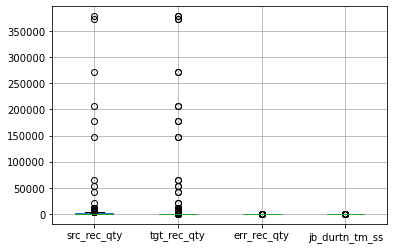

In [9]:
#outliers checking 
dataDropDF.boxplot()

c:\users\amhotta\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\amhotta\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\amhotta\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if n

array([[<AxesSubplot:title={'center':'err_rec_qty'}>,
        <AxesSubplot:title={'center':'jb_durtn_tm_ss'}>],
       [<AxesSubplot:title={'center':'src_rec_qty'}>,
        <AxesSubplot:title={'center':'tgt_rec_qty'}>]], dtype=object)

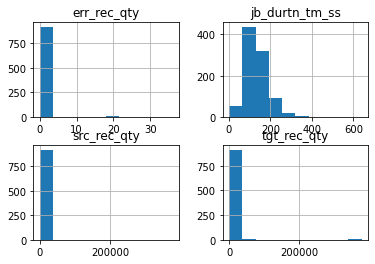

In [10]:
#histogram of whole data
dataDropDF.hist()

In [11]:
#IQR to remove outliers
dataDropDF=dataDropDF[(dataDropDF["jb_stts_cd"].str.strip() == "success")]
Q1 = dataDropDF.quantile(0.25)
Q3 = dataDropDF.quantile(0.75)
IQR = Q3 - Q1

dataDropDF = dataDropDF[~((dataDropDF < (Q1 - 1.5 * IQR)) |(dataDropDF > (Q3 + 1.5 * IQR))).any(axis=1)]
dataDropDF.shape

(644, 6)

<AxesSubplot:>

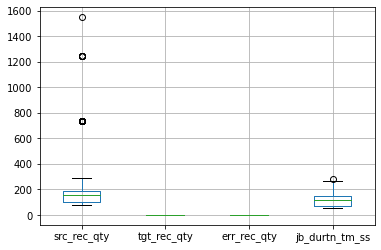

In [12]:
#after remove outliers 
dataDropDF.boxplot()

In [13]:
#after remove outliers 
dataDropDF.head(5)

,dta_lyr_nm,jb_stts_cd,src_rec_qty,tgt_rec_qty,err_rec_qty,jb_durtn_tm_ss
0,hist_ctrl,success,82,0,0,85
2,hist_ctrl,success,82,0,0,64
3,hist_rw,success,82,0,0,136
4,hist_ctrl,success,82,0,0,149
5,hist_rw,success,82,0,0,213


In [14]:
#one hot encoding 
one_hot_enc = pd.get_dummies(dataDropDF['dta_lyr_nm'])
one_hot_enc.head(5)

,hist_ctrl,hist_rw
0,1,0
2,1,0
3,0,1
4,1,0
5,0,1


In [16]:
#Join df and one hot encoding 
joinDF = dataDropDF.join(one_hot_enc).drop(['dta_lyr_nm','jb_stts_cd','tgt_rec_qty','err_rec_qty'],axis=1)
joinDF.head(5)

,src_rec_qty,jb_durtn_tm_ss,hist_ctrl,hist_rw
0,82,85,1,0
2,82,64,1,0
3,82,136,0,1
4,82,149,1,0
5,82,213,0,1


In [17]:
from sklearn.model_selection import train_test_split
joinDF=joinDF.reindex(columns=joinDF.columns)
joinDF.columns = joinDF.columns.str.strip()
X=joinDF[['src_rec_qty','hist_ctrl','hist_rw']]
X
y=joinDF.jb_durtn_tm_ss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
from sklearn.ensemble import RandomForestRegressor 
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [42]:
regressor.score(X_test,y_test)

0.789957057390952

In [50]:
d = {'src_rec_qty': [50000,500000], 'hist_ctrl': [1,0], 'hist_rw': [0,1]}
e = {'jb_durtn_tm_ss':[217,  104]}
df = pd.DataFrame(data=d)
df1=pd.DataFrame(data=e)
df

,src_rec_qty,hist_ctrl,hist_rw
0,50000,1,0
1,500000,0,1


In [51]:
#Predict Run time
y_pred_test = regressor.predict(df)
y_pred_test

array([105.52833333, 219.87927098])

In [25]:
regressor.score(df,df1)

0.99991600010312